In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget
import os
import sys
import importlib
import glob
from scipy.signal import find_peaks


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import bode_tools
import DREAM_colors as dc
import math_functions as mf
import BodeClass_PSI as bc
import ExperimentClass as ec

importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc)
importlib.reload(ec)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

In [113]:
list_path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/00_experiments_lists/"
exp_list = pd.read_csv(list_path + "00_bode_phaeo_list.csv", sep=";", decimal=",")
exp_list

,Name,F_max,F_max_source,A_voltage,Amp,Background,Strain,Amp_Ek,Offset_Ek,Label,Time_start,Date,Final protocol,Replicate,Cell_count_mL,Sample_vol_mL
0,20241011_bode_Pt2,0.449400,activation,18.7,28.8,Pt2,WT,0.75,2.50,WT,15,11/10/2024,no,0,1500000.0,2.4
1,20241014_bode_Pt2,0.213300,activation,25.7,34.6,Pt2,WT,1.50,3.13,WT,15,14/10/2024,no,0,906000.0,2.4
2,20241015_bode_KO6,0.359200,activation,28.1,38.9,Pt2,KO6,1.50,3.13,Lhcx1 KO,14,14/10/2024,no,0,1300000.0,2.4
3,20241021_bode_LtpM,0.351500,activation,27.3,30.8,Pt2,LtpM,1.50,3.13,Lhcx1 + +,14,21/10/2024,no,0,1300000.0,2.4
4,20241028_bode_Pt2x1KO6_2.5Ek,0.370112,bode,22.9,47.9,Pt2,KO6,1.50,2.50,Lhcx1 KO,16,25/10/2024,no,0,1360000.0,2.4
5,20241028_bode_LtpM_2.5Ek,0.395237,bode,19.3,37.0,Pt2,LtpM,1.50,2.50,Lhcx1 + +,11,28/10/2024,no,0,1600000.0,2.4
6,20241104_bode_Pt1-1,0.307173,bode,20.2,39.7,Pt1,Pt1-1,1.50,2.50,WT,17,04/11/2024,yes,1,1570000.0,2.4
7,20241104_bode_Pt1-3,0.325595,bode,20.2,39.7,Pt1,Pt1-3,1.50,2.50,VDE KO,14,04/11/2024,yes,1,1880000.0,1.9
8,20241105_bode_Pt1-26,0.326244,bode,20.4,40.5,Pt1,Pt1-26,1.50,2.50,ZEP3 - -,16,05/11/2024,yes,1,1660000.0,2.2
9,20241105_bode_Pt1-27,0.354332,bode,18.7,35.3,Pt1,Pt1-27,1.50,2.50,ZEP3 + +,13,05/11/2024,yes,1,1600000.0,2.4


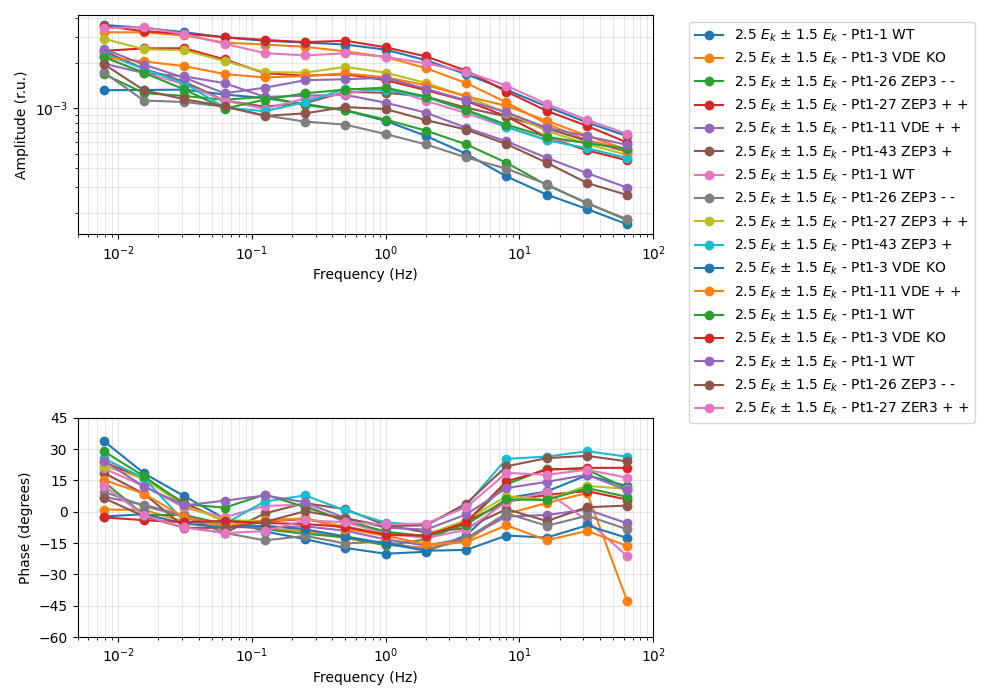

In [114]:
names = exp_list[exp_list["Background"] == "Pt1"]["Name"].to_list()

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]
results = []
A_input = []
norm_Fmax = []
labels = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
    i_list = exp_list[exp_list["Name"] == name].index[0]
    A_input.append(exp_list.iloc[i_list]["Amp"])
    norm_Fmax.append(exp_list.iloc[i_list]["F_max"])
    label = f"{exp_list.iloc[i_list]['Offset_Ek']} $E_k$ ± {exp_list.iloc[i_list]['Amp_Ek']} $E_k$ - {exp_list.iloc[i_list]['Strain']} {exp_list.iloc[i_list]['Label']}"
    labels.append(label)

fig, ax = plt.subplots(2, 1, figsize = (10, 7))

for i, result in enumerate(results):
    
    harmonics = result
    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])
    phase = harmonics['P_0'] - 180 - ref_phase
    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].grid(which ="both", alpha = 0.3)
ax[1].grid(which = "both", alpha = 0.3)

ax[1].set_ylim(-60, 15)
ax[1].set_yticks(np.arange(-60, 45 + 15, 15))

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

fig.tight_layout()

fig.savefig(list_path + "compare.png", dpi = 300)

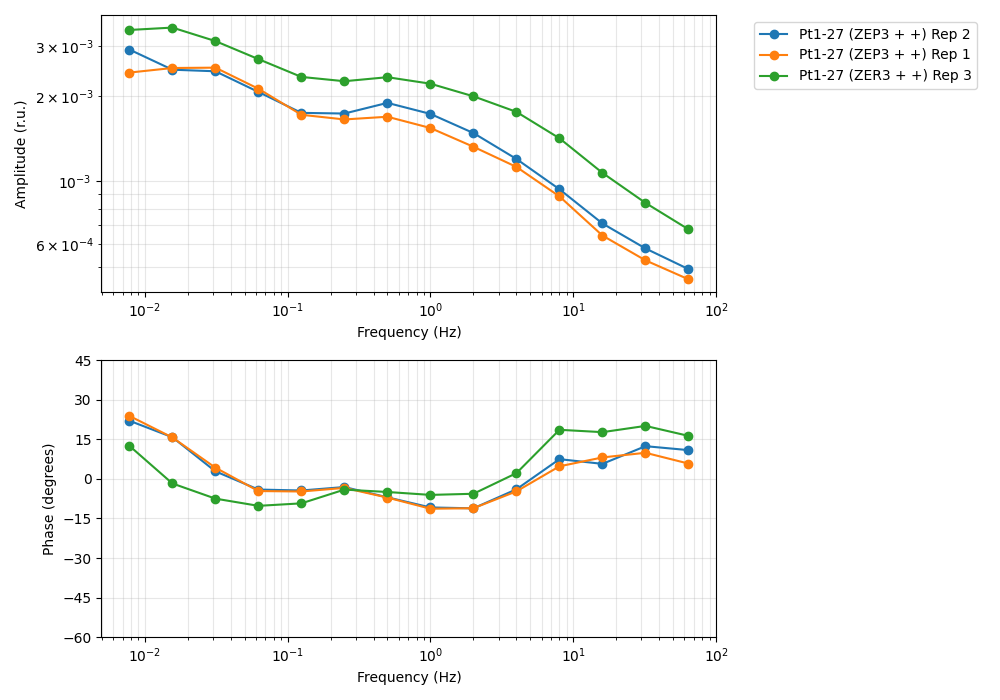

In [115]:
names = ["20241120_bode_Pt1-27", "20241105_bode_Pt1-27", "20241201_bode_Pt1-27"]
# names = ["20241104_bode_Pt1-3", "20241125_bode_Pt1-3"]
# names = ["20241112_bode_Pt1-11", "20241126_bode_Pt1-11"]
# names = ["20241104_bode_Pt1-1", "20241118_bode_Pt1-1", "20241127_bode_Pt1-1", "20241129_bode_Pt1-1"]
# names = ["20241104_bode_Pt1-3", "20241125_bode_Pt1-3", "20241128_bode_Pt1-3"]


ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]
results = []
A_input = []
norm_Fmax = []
labels = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
    i_list = exp_list[exp_list["Name"] == name].index[0]
    A_input.append(exp_list.iloc[i_list]["Amp"])
    norm_Fmax.append(exp_list.iloc[i_list]["F_max"])
    label = f"{exp_list.iloc[i_list]['Strain']} ({exp_list.iloc[i_list]['Label']}) Rep {exp_list.iloc[i_list]['Replicate']}"
    labels.append(label)

fig, ax = plt.subplots(2, 1, figsize = (10, 7))

for i, result in enumerate(results):
    
    harmonics = result
    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])
    phase = harmonics['P_0'] - 180 - ref_phase
    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].grid(which ="both", alpha = 0.3)
ax[1].grid(which = "both", alpha = 0.3)

ax[1].set_ylim(-60, 15)
ax[1].set_yticks(np.arange(-60, 45 + 15, 15))

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

fig.tight_layout()

fig.savefig(list_path + "compare.png", dpi = 300)

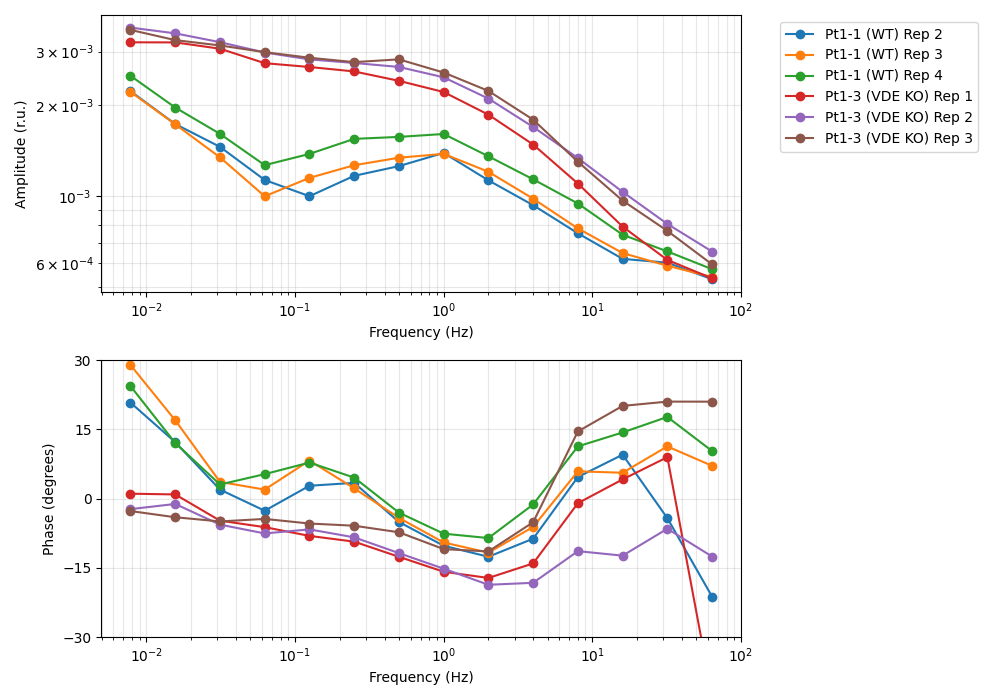

In [109]:
# names = ["20241120_bode_Pt1-27", "20241105_bode_Pt1-27"]
# names = ["20241104_bode_Pt1-3", "20241125_bode_Pt1-3"]
# names = ["20241112_bode_Pt1-11", "20241126_bode_Pt1-11"]
names = ["20241118_bode_Pt1-1", "20241127_bode_Pt1-1", "20241129_bode_Pt1-1", "20241104_bode_Pt1-3", "20241125_bode_Pt1-3", "20241128_bode_Pt1-3"]
# names = ["20241104_bode_Pt1-3", "20241125_bode_Pt1-3", "20241128_bode_Pt1-3"]


ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]
results = []
A_input = []
norm_Fmax = []
labels = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
    i_list = exp_list[exp_list["Name"] == name].index[0]
    A_input.append(exp_list.iloc[i_list]["Amp"])
    norm_Fmax.append(exp_list.iloc[i_list]["F_max"])
    label = f"{exp_list.iloc[i_list]['Strain']} ({exp_list.iloc[i_list]['Label']}) Rep {exp_list.iloc[i_list]['Replicate']}"
    labels.append(label)

fig, ax = plt.subplots(2, 1, figsize = (10, 7))

for i, result in enumerate(results):
    
    harmonics = result
    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])
    phase = harmonics['P_0'] - 180 - ref_phase
    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].grid(which ="both", alpha = 0.3)
ax[1].grid(which = "both", alpha = 0.3)

ax[1].set_ylim(-30, 15)
ax[1].set_yticks(np.arange(-30, 30 + 15, 15))

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

fig.tight_layout()

fig.savefig(list_path + "compare.png", dpi = 300)

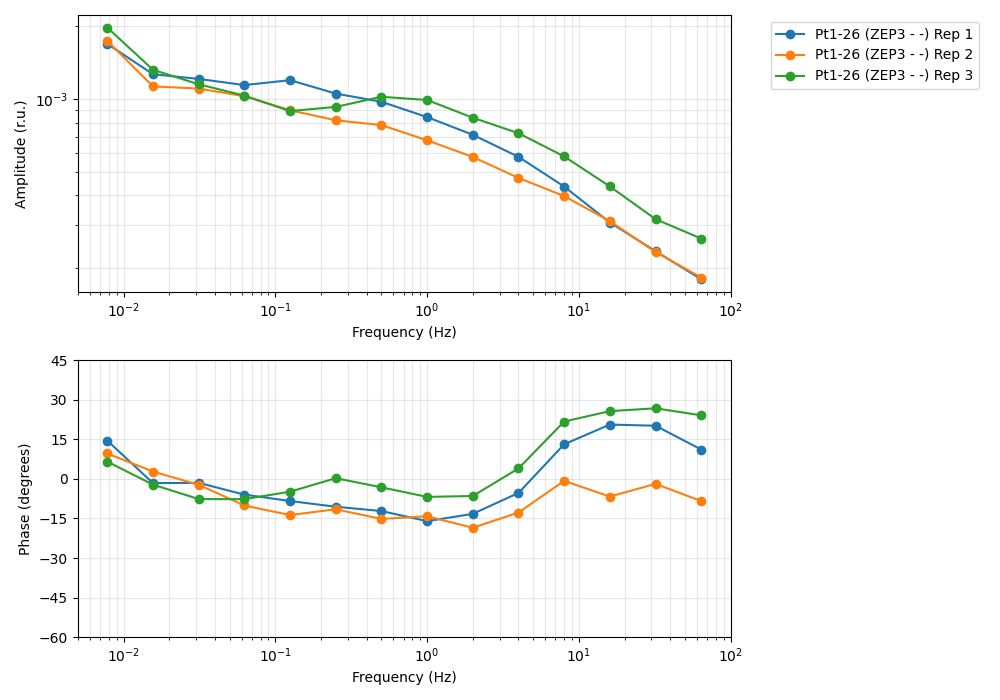

In [110]:
# names = ["20241113_bode_Pt1-43", "20241121_bode_Pt1-43", "20241118_bode_Pt1-1", "20241120_bode_Pt1-27", "20241105_bode_Pt1-27", 
# "20241119_bode_Pt1-26", "20241105_bode_Pt1-26", "20241104_bode_Pt1-1"]

# names = ["20241113_bode_Pt1-43", "20241121_bode_Pt1-43", "20241118_bode_Pt1-1", "20241120_bode_Pt1-27", "20241105_bode_Pt1-27"]

# names = ["20241113_bode_Pt1-43", "20241121_bode_Pt1-43", "20241118_bode_Pt1-1", "20241120_bode_Pt1-27", "20241105_bode_Pt1-27", "20241119_bode_Pt1-26", "20241105_bode_Pt1-26"]

# names = ["20241113_bode_Pt1-43", "20241121_bode_Pt1-43", "20241118_bode_Pt1-1", "20241120_bode_Pt1-27", "20241105_bode_Pt1-27",
        #  "20241119_bode_Pt1-26", "20241105_bode_Pt1-26", "20241104_bode_Pt1-3", "20241125_bode_Pt1-3", "20241112_bode_Pt1-11", "20241126_bode_Pt1-11"]

# names = ["20241113_bode_Pt1-43", "20241121_bode_Pt1-43", "20241118_bode_Pt1-1", "20241120_bode_Pt1-27", "20241105_bode_Pt1-27",
        #  "20241104_bode_Pt1-3", "20241125_bode_Pt1-3"]

# names = ["20241118_bode_Pt1-1", "20241104_bode_Pt1-3", "20241125_bode_Pt1-3", "20241112_bode_Pt1-11",  "20241119_bode_Pt1-26", "20241105_bode_Pt1-26"]

# names = ["20241104_bode_Pt1-3", "20241125_bode_Pt1-3", "20241128_bode_Pt1-3"]

names = ["20241105_bode_Pt1-26", "20241119_bode_Pt1-26", "20241130_bode_Pt1-26"]

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]
results = []
A_input = []
norm_Fmax = []
labels = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
    i_list = exp_list[exp_list["Name"] == name].index[0]
    A_input.append(exp_list.iloc[i_list]["Amp"])
    norm_Fmax.append(exp_list.iloc[i_list]["F_max"])
    label = f"{exp_list.iloc[i_list]['Strain']} ({exp_list.iloc[i_list]['Label']}) Rep {exp_list.iloc[i_list]['Replicate']}"
    labels.append(label)

fig, ax = plt.subplots(2, 1, figsize = (10, 7))

for i, result in enumerate(results):
    
    harmonics = result
    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])
    phase = harmonics['P_0'] - 180 - ref_phase
    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].grid(which ="both", alpha = 0.3)
ax[1].grid(which = "both", alpha = 0.3)

ax[1].set_ylim(-60, 15)
ax[1].set_yticks(np.arange(-60, 45 + 15, 15))

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

fig.tight_layout()

fig.savefig(list_path + "compare.png", dpi = 300)

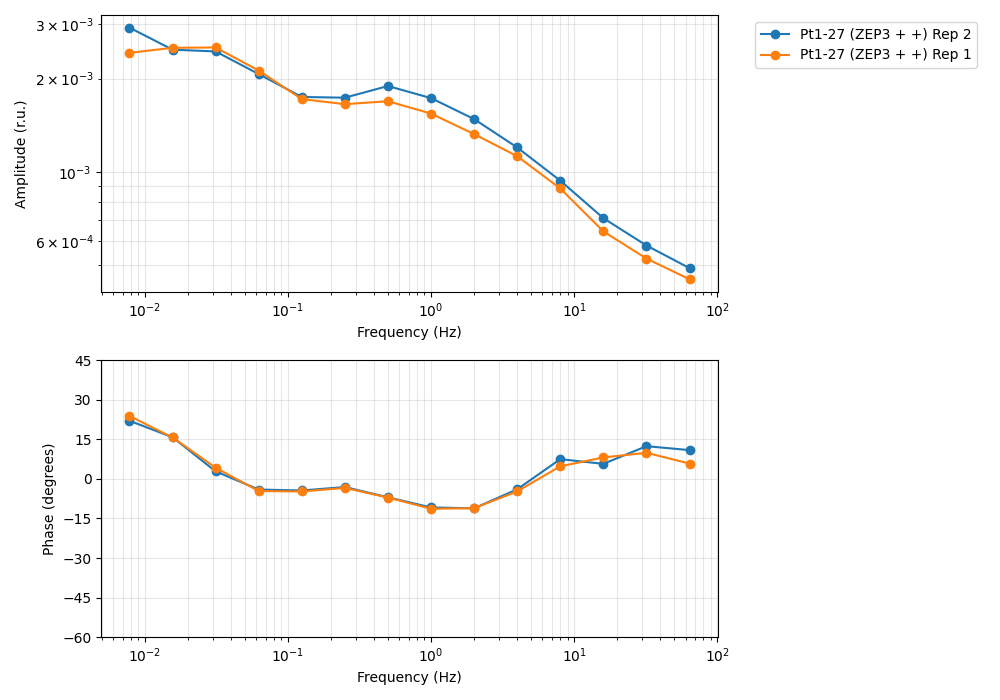

In [ ]:
names = ["20241120_bode_Pt1-27", "20241105_bode_Pt1-27"]

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]
results = []
A_input = []
norm_Fmax = []
labels = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
    i_list = exp_list[exp_list["Name"] == name].index[0]
    A_input.append(exp_list.iloc[i_list]["Amp"])
    norm_Fmax.append(exp_list.iloc[i_list]["F_max"])
    label = f"{exp_list.iloc[i_list]['Strain']} ({exp_list.iloc[i_list]['Label']}) Rep {exp_list.iloc[i_list]['Replicate']}"
    labels.append(label)

fig, ax = plt.subplots(2, 1, figsize = (10, 7))

for i, result in enumerate(results):
    
    harmonics = result
    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])
    phase = harmonics['P_0'] - 180 - ref_phase
    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].grid(which ="both", alpha = 0.3)
ax[1].grid(which = "both", alpha = 0.3)

ax[1].set_ylim(-60, 15)
ax[1].set_yticks(np.arange(-60, 45 + 15, 15))

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

fig.tight_layout()

fig.savefig(list_path + "compare.png", dpi = 300)

In [5]:
exp_list

,Name,F_max,F_max_source,A_voltage,Amp,Background,Strain,Amp_Ek,Offset_Ek,Label,Time_start,Date,Final protocol,Replicate,Cell_count_mL,Sample_vol_mL
0,20241011_bode_Pt2,0.449400,activation,18.7,28.8,Pt2,WT,0.75,2.50,WT,15,11/10/2024,no,0,1500000.00,2.4
1,20241014_bode_Pt2,0.213300,activation,25.7,34.6,Pt2,WT,1.50,3.13,WT,15,14/10/2024,no,0,906000.00,2.4
2,20241015_bode_KO6,0.359200,activation,28.1,38.9,Pt2,KO6,1.50,3.13,Lhcx1 KO,14,14/10/2024,no,0,1300000.00,2.4
3,20241021_bode_LtpM,0.351500,activation,27.3,30.8,Pt2,LtpM,1.50,3.13,Lhcx1 + +,14,21/10/2024,no,0,1300000.00,2.4
4,20241028_bode_Pt2x1KO6_2.5Ek,0.370112,bode,22.9,47.9,Pt2,KO6,1.50,2.50,Lhcx1 KO,16,25/10/2024,no,0,1360000.00,2.4
5,20241028_bode_LtpM_2.5Ek,0.395237,bode,19.3,37.0,Pt2,LtpM,1.50,2.50,Lhcx1 + +,11,28/10/2024,no,0,1600000.00,2.4
6,20241104_bode_Pt1-1,0.307173,bode,20.2,39.7,Pt1,Pt1-1,1.50,2.50,WT,17,04/11/2024,yes,1,1.57,2.4
7,20241104_bode_Pt1-3,0.325595,bode,20.2,39.7,Pt1,Pt1-3,1.50,2.50,VDE KO,14,04/11/2024,yes,1,1880000.00,1.9
8,20241105_bode_Pt1-26,0.326244,bode,20.4,40.5,Pt1,Pt1-26,1.50,2.50,ZEP3 - -,16,05/11/2024,yes,1,1660000.00,2.2
9,20241105_bode_Pt1-27,0.354332,bode,18.7,35.3,Pt1,Pt1-27,1.50,2.50,ZEP3 + +,13,05/11/2024,yes,1,1600000.00,2.4


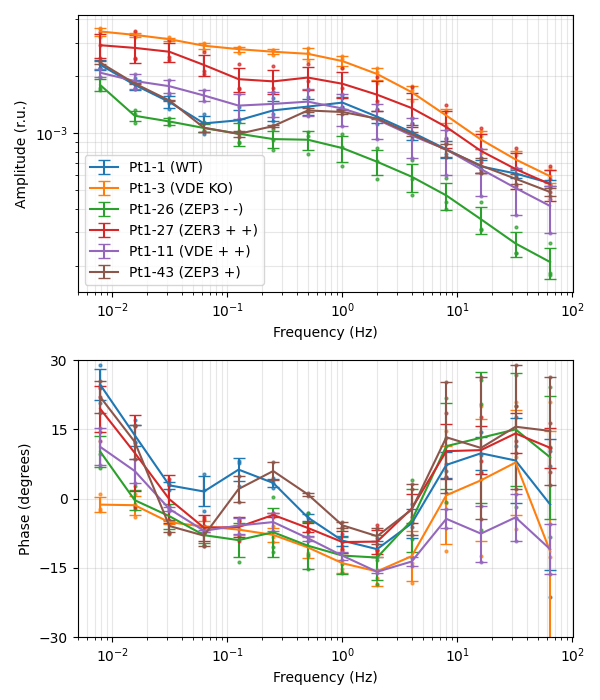

In [118]:
ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
    -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
    -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
    -6.45168624,  -6.61327604]

marker = 2
alpha = 0.7

strains = ["Pt1-1", "Pt1-3", "Pt1-26", "Pt1-27", "Pt1-11", "Pt1-43"]
fig, ax = plt.subplots(2, 1, figsize = (6, 7))

for i, strain in enumerate(strains):
    if strain == "Pt1-1":
        names = exp_list[(exp_list["Strain"] == strain) & (exp_list["Replicate"]!=1)]["Name"].to_list()
    else:
        names = exp_list[exp_list["Strain"] == strain]["Name"].to_list()

    amplitudes = []
    phases = []
    
    for name in names:
        path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
        harmonics = pd.read_csv(path, index_col= False, sep=";")
        i_list = exp_list[exp_list["Name"] == name].index[0]
        A_input = exp_list.iloc[i_list]["Amp"]
        norm_Fmax = exp_list.iloc[i_list]["F_max"]
        ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax * A_input), 'o', color = f"C{i}", markersize = marker, alpha = alpha)
        phase = harmonics['P_0'] - 180 - ref_phase
        ax[1].semilogx(harmonics['f_input'], phase, 'o', color = f"C{i}", markersize = marker, alpha = alpha)
        amplitudes.append(harmonics['A_0']/(norm_Fmax * A_input))
        phases.append(phase)
    
    label = f"{strain} ({exp_list.iloc[i_list]['Label']})"
    amplitudes = np.array(amplitudes)
    phases = np.array(phases)
    mean_amplitude = np.mean(amplitudes, axis = 0)
    std_amplitude = np.std(amplitudes, axis = 0)
    mean_phase = np.mean(phases, axis = 0)
    std_phase = np.std(phases, axis = 0)
    ax[0].errorbar(harmonics['f_input'], mean_amplitude, yerr = std_amplitude, color = f"C{i}", label = label, capsize = 4)
    ax[1].errorbar(harmonics['f_input'], mean_phase, yerr = std_phase, color = f"C{i}", label = label, capsize = 4)
    # ax[0].fill_between(harmonics['f_input'], mean_amplitude - std_amplitude, mean_amplitude + std_amplitude, color = f"C{i}", alpha = 0.1)
    # ax[1].fill_between(harmonics['f_input'], mean_phase - std_phase, mean_phase + std_phase, color = f"C{i}", alpha = 0.1)
    
ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].grid(which ="both", alpha = 0.3)
ax[1].grid(which = "both", alpha = 0.3)

ax[1].set_ylim(-30, 30)
ax[1].set_yticks(np.arange(-30, 30 + 15, 15))

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend()

fig.tight_layout()
    